# Telco Churn Analysis

In [2]:
#importing the necessary dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loading the dataset
churn_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#getting general info on the dataset
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
churn_data.duplicated().sum()

0

There are neither missing values nor duplicated rows in the dataset

**Exploratory Data Analysis(EDA)**

**Demographic**:
1. Which 2 demographics have proven to be the most popular with the telco brand?
2. If the marketing team wanted to increase customer retention, to whom should they target their advertisements to?

Analysis of the following columns will help in  understanding the demographics:
1. gender
2. Senior citizen
3. Dependents
4. Partner

In [8]:
#understanding gender
churn_data['gender'].value_counts(normalize = True)

Male      0.504756
Female    0.495244
Name: gender, dtype: float64

<AxesSubplot:>

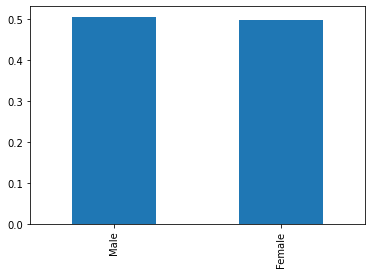

In [9]:
#plotting the distribution
churn_data['gender'].value_counts(normalize = True).plot.bar()

There are almost an equal number of male and female customers.

In [13]:
#SeniorCitizen
churn_data['SeniorCitizen'].value_counts(normalize = True)

0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64

<AxesSubplot:>

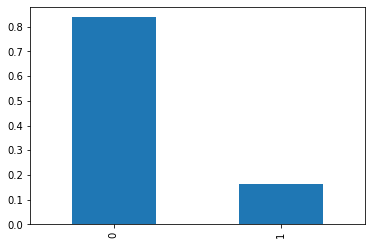

In [12]:
churn_data['SeniorCitizen'].value_counts(normalize = True).plot.bar()

About 84% of the customers are non-senior citizens. 

In [18]:
#dependents
churn_data['Dependents'].value_counts(normalize = True)

No     0.700412
Yes    0.299588
Name: Dependents, dtype: float64

<AxesSubplot:>

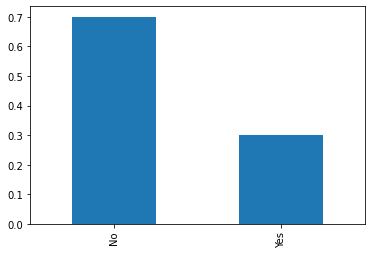

In [17]:
churn_data['Dependents'].value_counts(normalize = True).plot.bar()

About 70% of the customers do nothave dependents.

In [20]:
churn_data['Partner'].unique()

array(['Yes', 'No'], dtype=object)

<AxesSubplot:>

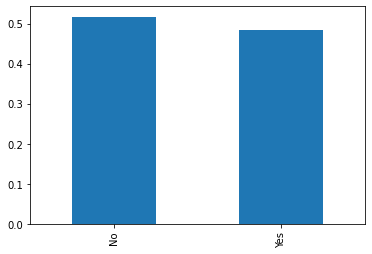

In [113]:
churn_data['Partner'].value_counts(normalize = True).plot.bar()

There are almost an equal number of customers with and without partners. Therefore, from the above analysis, the brand is popular among non-senior citizen and customers with dependents.

In [38]:
# bivariate analysis function
def bivariate_analysis(var1,var2):
    #getting the relationship between the target variable and categorical independent variables
    #crosstab
    category = pd.crosstab(churn_data[var1],churn_data[var2])

    #stacked bar plot to show propotion of approved and unapproved loans.
    category.div(category.sum(1).astype(float),axis = 0).plot(kind = 'bar',stacked=True,figsize = (4,4))
    plt.xlabel(var1)
    plt.ylabel('Percentage')
    plt.legend(loc =4)
    plt.show()
    

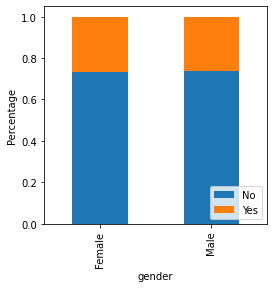

In [39]:
bivariate_analysis('gender','Churn')

There is a similar propotion of male and female customers leaving.

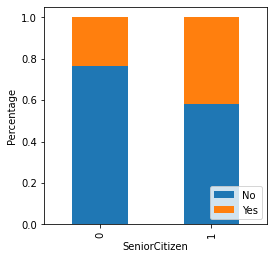

In [40]:
#churn on seniorcitizen
bivariate_analysis('SeniorCitizen','Churn')

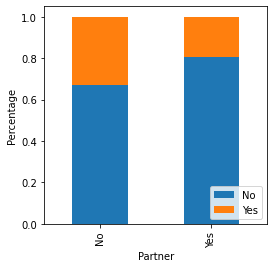

In [112]:
#partner status
bivariate_analysis('Partner','Churn')

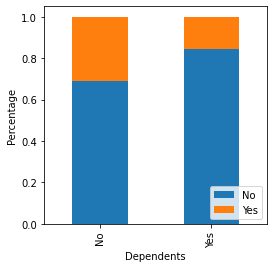

In [41]:
bivariate_analysis('Dependents','Churn')

There are more number senior citizens leaving. Customers with parteners have a lower tendency to leave. There is also a higher propotion of customers with no dependents leavinhg. Therefore to increase the customer retention, the marketing team can focus its advertisements on senior citizens and customers without dependents.

**Services**:

a. Which 3 services are contributing to a higher monthly charge and resulting to customers churning? (Use visualizations in explaining your analysis)
b. If the telco was to offer Phone as a standalone service, which type of contract would encourage customer retention?

In [32]:
churn_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

The servies offered are:
1. PhoneService
2. Internet Service
3. Online Security
4. Online Backup
5. Device Protection
6. Tech Support
7. Streaming TV
8. Streaming Movies

In [56]:
#The services provided by the Telco company
services = ['PhoneService', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies']

In [57]:
#Getting the mean monthly charges for the services
mean_charge = []
churn_rate = 
for service in services:
    mean_charge.append(churn_data[churn_data[service] != 'No']['MonthlyCharges'].mean())

In [75]:
mean_charge

[67.19904103128435,
 76.8442541236179,
 53.97524682651612,
 59.15854614412127,
 60.183979229989774,
 55.20365546218475,
 64.34613749114095,
 64.32186472522292]

<AxesSubplot:xlabel='Services'>

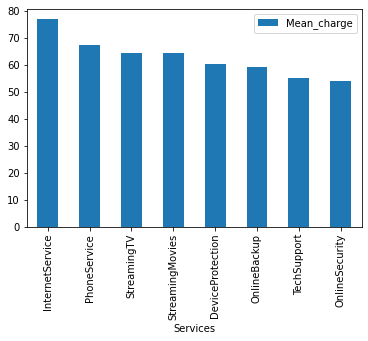

In [94]:
#creating a services dataframe
data = {'Services':services,'Mean_charge':mean_charge}
services_data = pd.DataFrame(data).set_index('Services')
services_data.sort_values('Mean_charge',ascending = False).plot.bar()


The top three services with the highest monthly charges are:
1. Internet Service
2. Phone Service
3. Streaming TV
    

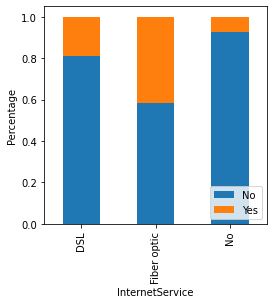

In [95]:
#The churn rate for the top 3 services with the highest monthly charge
bivariate_analysis('InternetService','Churn')

Customers connected to Fiber Optic have the highest churn rate

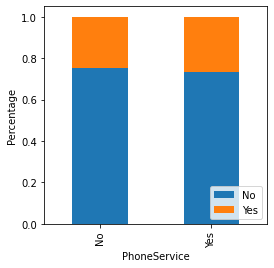

In [96]:
#Phone Service
bivariate_analysis('PhoneService','Churn')

There isn't a considerable difference in the churn rate between customers with and without phone service.

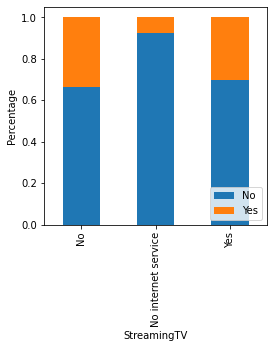

In [97]:
bivariate_analysis('StreamingTV','Churn')

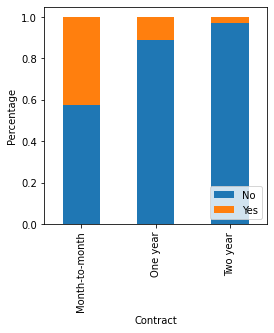

In [98]:
#types of contract vs churn rate
bivariate_analysis('Contract','Churn')


Month to Month contracts have the highest churn rate, while Two year contracts have the lowest churn rates. Therfore the best contract for telco to offer phone as a standalone service would be **Two Year contracts**

**Payment: (Use visualizations in explaining your analysis)**

a. If the company was to streamline all its services into 3 bouquet packages, what monthly prices will be appropriate for the following packages to keep customers from churning:
1.  Basic
2.  Plus
3. Premium

b. Should the company strictly go paperless for their monthly billings as a technique of keeping their customers and why?

In [99]:
churn_data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


<AxesSubplot:xlabel='MonthlyCharges'>

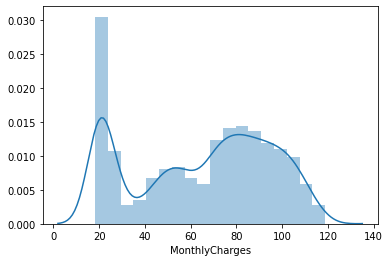

In [104]:
#Monthly charges distribution
sns.distplot(churn_data['MonthlyCharges'])

In [107]:
#getting some important data points on the monthly charge
print('The Mean is :',churn_data['MonthlyCharges'].mean())
print('The Max charge is :',churn_data['MonthlyCharges'].max())
print('The Min charge is: ',churn_data['MonthlyCharges'].min())

The Mean is : 64.76169246059922
The Max charge is : 118.75
The Min charge is:  18.25


<AxesSubplot:xlabel='Churn'>

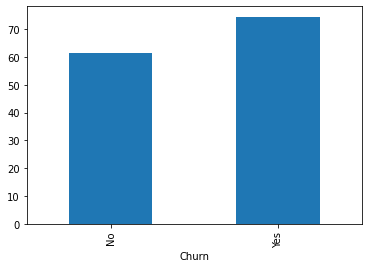

In [105]:
churn_data.groupby('Churn')['MonthlyCharges'].mean().plot.bar()

The above plot shows that the customers leaving are payinga slightly higher monthly charge. 

In [109]:
#grouping the monthly charges into 5 bins
bins = [0,25,50,75,100,125]
group = ['Very Low','Low','Average','High','Very High']

#categorizing
churn_data['Monthly Category'] = pd.cut(churn_data['MonthlyCharges'],bins,labels=group)

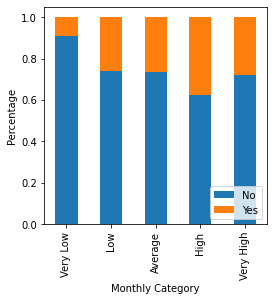

In [110]:
bivariate_analysis('Monthly Category','Churn')

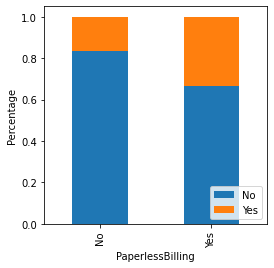

In [111]:
#Paperless billing analysis
bivariate_analysis('PaperlessBilling','Churn')

We can infer from the above plot that customers who use paperless billing have a higher propensity to leave.